In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 

In [2]:
#data = pd.read_excel('./CFTR-interactome-data_merged_20210524.xlsx', skiprows=2)
#data = pd.read_excel('./CFTR-interactome-data_merged_20210701.xlsx')

data = pd.read_excel('./CFTR-interactome-data_merged_20210705_2.xlsx')

In [3]:
# drop runs 7, 8, and 9 
keep_run = []
for i in data:
    if 'Run 7' not in i and 'Run 9' not in i and 'Run 8' not in i:
        keep_run.append(i)

In [4]:
data2 = data[keep_run]

In [5]:
# get the medians for each run 
run_meds = {'Run 1': [], 'Run 2': [], 'Run 3': [], 'Run 4': [],
            'Run 5': [], 'Run 6': [], 'Run 7': [], 'Run 8': [],
            'Run 9': [], 'Run 10': [], 'Run 11': [], 'Run 12' : [],
            'Run 13' : []}

for i in data2:
    if 'Run 1 ' in i:
        run_meds['Run 1'].append(data2[i].median())
    if 'Run 2 ' in i:
        run_meds['Run 2'].append(data2[i].median())
    if 'Run 3 ' in i:
        run_meds['Run 3'].append(data2[i].median())
    if 'Run 4 ' in i:
        run_meds['Run 4'].append(data2[i].median())
    if 'Run 5 ' in i:
        run_meds['Run 5'].append(data2[i].median())
    if 'Run 6 ' in i:
        run_meds['Run 6'].append(data2[i].median())
    if 'Run 10 ' in i:
        run_meds['Run 10'].append(data2[i].median())
    if 'Run 11 ' in i:
        run_meds['Run 11'].append(data2[i].median())
    if 'Run 12 ' in i:
        run_meds['Run 12'].append(data2[i].median())
    if 'Run 13 ' in i:
        run_meds['Run 13'].append(data2[i].median())

In [6]:
# normalize to the median 
data3 = pd.DataFrame()
data3['Gene Name'] = data2['Gene Name']
for i in data2:
    if 'Run' in i:
        run = ' '.join(i.split(' ')[0:2])
        norm = np.mean(run_meds[run])/ data2[i].median()
        data3[i] = data2[i]*norm

In [13]:
TD1 = np.log2(data2['Run 1 TD-tomato'])
TD1 = TD1[~np.isnan(TD1)]
WT1 = np.log2(data2['Run 1 WT-DMSO'])
WT1 = WT1[~np.isnan(WT1)]

TD2 = np.log2(data2['Run 2 TD-tomato'])
TD2 = TD2[~np.isnan(TD2)]
WT2 = np.log2(data2['Run 2 WT-DMSO'])
WT2 = WT2[~np.isnan(WT2)]

TD3 = np.log2(data2['Run 3 TD-tomato'])
TD3 = TD3[~np.isnan(TD3)]
WT3 = np.log2(data2['Run 3 WT-DMSO'])
WT3 = WT3[~np.isnan(WT3)]

TD4 = np.log2(data2['Run 4 TD-tomato'])
TD4 = TD4[~np.isnan(TD4)]
WT4 = np.log2(data2['Run 4 WT-DMSO'])
WT4 = WT4[~np.isnan(WT4)]

TD5 = np.log2(data2['Run 5 TD-tomato'])
TD5 = TD5[~np.isnan(TD5)]
WT5 = np.log2(data2['Run 5 WT-DMSO'])
WT5 = WT5[~np.isnan(WT5)]

TD6 = np.log2(data2['Run 6 td-tomato'])
TD6 = TD6[~np.isnan(TD6)]
WT6 = np.log2(data2['Run 6 WT-DMSO'])
WT6 = WT6[~np.isnan(WT6)]

TD10 = np.log2(data2['Run 10 TD-tomato'])
TD10 = TD10[~np.isnan(TD10)]
WT10 = np.log2(data2['Run 10 WT-DMSO'])
WT10 = WT10[~np.isnan(WT10)]

TD11 = np.log2(data2['Run 11 TD-tomato'])
TD11 = TD11[~np.isnan(TD11)]
WT11 = np.log2(data2['Run 11 WT-DMSO'])
WT11 = WT11[~np.isnan(WT11)]

TD12 = np.log2(data2['Run 12 TD-tomato  avg'])
TD12 = TD12[~np.isnan(TD12)]
WT12 = np.log2(data2['Run 12 WT-DMSO'])
WT12 = WT12[~np.isnan(WT12)]

TD13 = np.log2(data2['Run 13 TD-tomato'])
TD13 = TD13[~np.isnan(TD13)]
WT13 = np.log2(data2['Run 13 WT-DMSO'])
WT13 = WT13[~np.isnan(WT13)]


/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


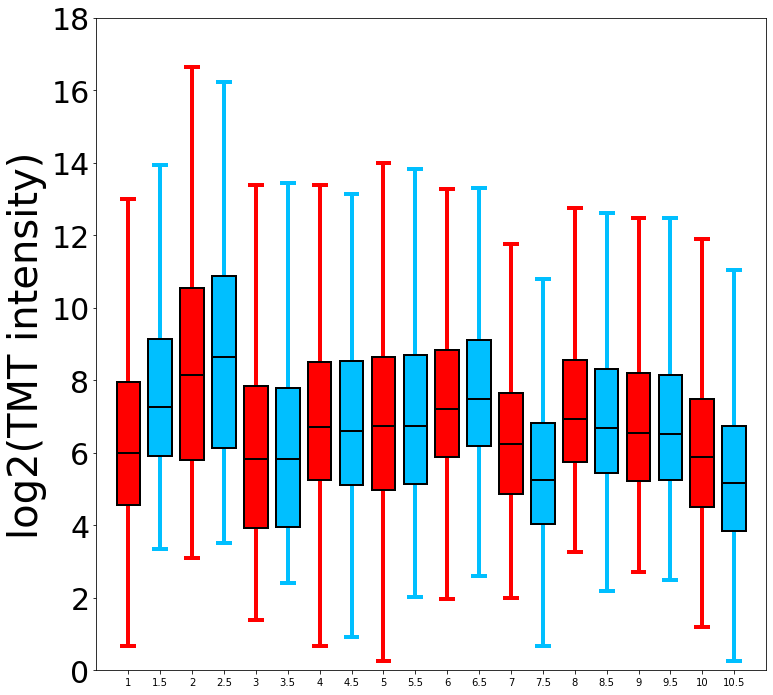

In [14]:
c='red'
c2 = 'deepskyblue'
plt.figure(figsize=(12,12))

plt.boxplot([TD1, TD2, TD3, TD4, TD5, TD6, TD10, TD11, TD12, TD13], 
            positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            widths = 0.37,
            whis=1.5, patch_artist=True,
            boxprops=dict(facecolor=c, color='k', lw =2),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='k', lw=2),
            showfliers=0)


plt.boxplot([WT1, WT2, WT3, WT4, WT5, WT6, WT10, WT11, WT12, WT13], 
            positions=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5],
            widths = 0.37,
            whis=1.5, patch_artist=True,
            boxprops=dict(facecolor=c2, color='k', lw=2),
            capprops=dict(color=c2, lw=4),
            whiskerprops=dict(color=c2, lw=4),
            flierprops=dict(color=c2, markeredgecolor=c2),
            medianprops=dict(color='k', lw =2), 
            showfliers=0)
plt.yticks(fontsize=30)
plt.ylim(0,18)
plt.ylabel('log2(TMT intensity)', fontsize=40)
plt.savefig('../Figures/unnormalized_TMT_int.svg', format='svg')
plt.show()



In [9]:
TD1 = np.log2(data3['Run 1 TD-tomato'])
TD1 = TD1[~np.isnan(TD1)]
WT1 = np.log2(data3['Run 1 WT-DMSO'])
WT1 = WT1[~np.isnan(WT1)]

TD2 = np.log2(data3['Run 2 TD-tomato'])
TD2 = TD2[~np.isnan(TD2)]
WT2 = np.log2(data3['Run 2 WT-DMSO'])
WT2 = WT2[~np.isnan(WT2)]

TD3 = np.log2(data3['Run 3 TD-tomato'])
TD3 = TD3[~np.isnan(TD3)]
WT3 = np.log2(data3['Run 3 WT-DMSO'])
WT3 = WT3[~np.isnan(WT3)]

TD4 = np.log2(data3['Run 4 TD-tomato'])
TD4 = TD4[~np.isnan(TD4)]
WT4 = np.log2(data3['Run 4 WT-DMSO'])
WT4 = WT4[~np.isnan(WT4)]

TD5 = np.log2(data3['Run 5 TD-tomato'])
TD5 = TD5[~np.isnan(TD5)]
WT5 = np.log2(data3['Run 5 WT-DMSO'])
WT5 = WT5[~np.isnan(WT5)]

TD6 = np.log2(data3['Run 6 td-tomato'])
TD6 = TD6[~np.isnan(TD6)]
WT6 = np.log2(data3['Run 6 WT-DMSO'])
WT6 = WT6[~np.isnan(WT6)]

TD10 = np.log2(data3['Run 10 TD-tomato'])
TD10 = TD10[~np.isnan(TD10)]
WT10 = np.log2(data3['Run 10 WT-DMSO'])
WT10 = WT10[~np.isnan(WT10)]

TD11 = np.log2(data3['Run 11 TD-tomato'])
TD11 = TD11[~np.isnan(TD11)]
WT11 = np.log2(data3['Run 11 WT-DMSO'])
WT11 = WT11[~np.isnan(WT11)]


TD12 = np.log2(data3['Run 12 TD-tomato  avg'])
TD12 = TD12[~np.isnan(TD12)]
WT12 = np.log2(data3['Run 12 WT-DMSO'])
WT12 = WT12[~np.isnan(WT12)]

TD13 = np.log2(data3['Run 13 TD-tomato'])
TD13 = TD13[~np.isnan(TD13)]
WT13 = np.log2(data3['Run 13 WT-DMSO'])
WT13 = WT13[~np.isnan(WT13)]


/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/elimcdonald/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


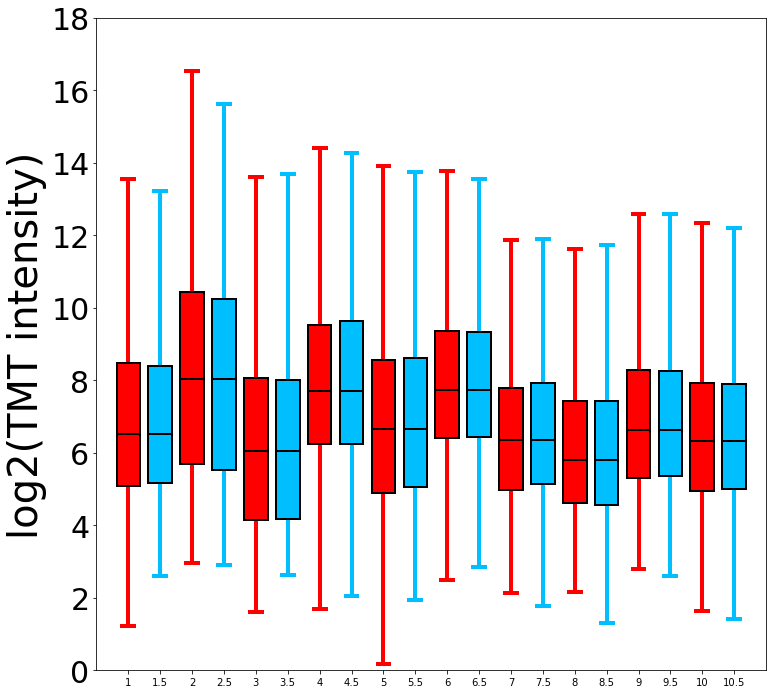

In [12]:
c='red'
c2 = 'deepskyblue'
plt.figure(figsize=(12,12))

plt.boxplot([TD1, TD2, TD3, TD4, TD5, TD6, TD10, TD11, TD12, TD13], 
            positions=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            widths = 0.37,
            whis=1.5, patch_artist=True,
            boxprops=dict(facecolor=c, color='k', lw =2),
            capprops=dict(color=c, lw=4),
            whiskerprops=dict(color=c, lw=4),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='k', lw=2),
            showfliers=0)


plt.boxplot([WT1, WT2, WT3, WT4, WT5, WT6, WT10, WT11, WT12, WT13], 
            positions=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5],
            widths = 0.37,
            whis=1.5, patch_artist=True,
            boxprops=dict(facecolor=c2, color='k', lw=2),
            capprops=dict(color=c2, lw=4),
            whiskerprops=dict(color=c2, lw=4),
            flierprops=dict(color=c2, markeredgecolor=c2),
            medianprops=dict(color='k', lw =2), 
            showfliers=0)
plt.yticks(fontsize=30)
plt.ylim(0,18)
plt.ylabel('log2(TMT intensity)', fontsize=40)
plt.savefig('../Figures/normalized_TMT_int.svg', format='svg')
plt.show()
